In [7]:
import pandas as pd
import numpy as np

In [8]:
data = pd.read_csv('examdata.csv')
# data.head()
print(data)

        Exam1      Exam2  Pass
0   34.623660  78.024693     0
1   30.286711  43.894998     0
2   35.847409  72.902198     0
3   60.182599  86.308552     1
4   79.032736  75.344376     1
..        ...        ...   ...
95  83.489163  48.380286     1
96  42.261701  87.103851     1
97  99.315009  68.775409     1
98  55.340018  64.931938     1
99  74.775893  89.529813     1

[100 rows x 3 columns]


In [9]:
data.loc[:,'Exam1']

0     34.623660
1     30.286711
2     35.847409
3     60.182599
4     79.032736
        ...    
95    83.489163
96    42.261701
97    99.315009
98    55.340018
99    74.775893
Name: Exam1, Length: 100, dtype: float64

In [10]:
data.loc[1:5,['Exam1','Pass']]

,Exam1,Pass
1,30.286711,0
2,35.847409,0
3,60.182599,1
4,79.032736,1
5,45.083277,0


In [78]:
data.loc[:,'Exam1']

0     34.623660
1     30.286711
2     35.847409
3     60.182599
4     79.032736
        ...    
95    83.489163
96    42.261701
97    99.315009
98    55.340018
99    74.775893
Name: Exam1, Length: 100, dtype: float64

In [12]:
mask = data.loc[:,'Pass'] == 1
print(mask)

0     False
1     False
2     False
3      True
4      True
      ...  
95     True
96     True
97     True
98     True
99     True
Name: Pass, Length: 100, dtype: bool


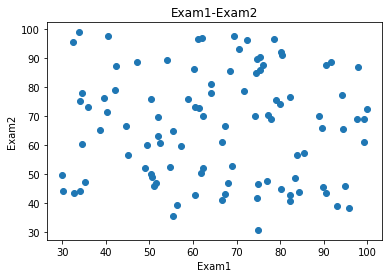

In [80]:
# %matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
# plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
plt.scatter(data.loc[:,'Exam1'],data.loc[:,'Exam2'])
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.show()

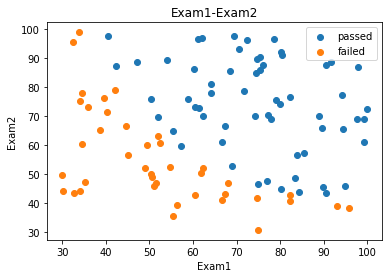

In [81]:
# %matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
passed = plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])

# plt.scatter(data.loc[:,'Exam1'][],data.loc[:,'Exam2'])
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [15]:
X = data.drop(['Pass'],axis = 1)
y = data.loc[:,'Pass']
x1  = data.loc[:,'Exam1']
x2  = data.loc[:,'Exam2']
x1.head()

0    34.623660
1    30.286711
2    35.847409
3    60.182599
4    79.032736
Name: Exam1, dtype: float64

In [18]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X,y)

LogisticRegression()

In [90]:
y_predict = LR.predict(X)
print(y_predict)

[0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]


In [65]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
print(accuracy)

0.89


In [26]:
y_test = LR.predict([[70,65]])
print(y_test)

[1]


/Users/chinazhouwy/opt/anaconda3/envs/learn_ai/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [27]:
print(LR.intercept_,LR.coef_)

[-25.05219314] [[0.20535491 0.2005838 ]]


In [69]:
print(LR.coef_[0][0],LR.coef_[0][1])

0.20535491217790391 0.20058380395469058


##  LR.intercept_+LR.coef_[0][0]*x1 + LR.coef_[0][1]*x2 = 0

In [19]:
x2_new = -(LR.intercept_+LR.coef_[0][0]*x1)/LR.coef_[0][1]
print(x2_new)

0     89.449169
1     93.889277
2     88.196312
3     63.282281
4     43.983773
        ...    
95    39.421346
96    81.629448
97    23.219064
98    68.240049
99    48.341870
Name: Exam1, Length: 100, dtype: float64


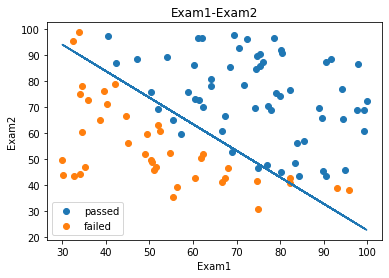

In [25]:
from matplotlib import pyplot as plt
fig1 = plt.figure()
passed = plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])
plt.plot(x1,x2_new)
# plt.scatter(data.loc[:,'Exam1'],data.loc[:,'Exam2'])
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

# 

## 芯片（二阶线性回归）

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('chip_test.csv')
# data.head()
print(data)

        test1     test2  pass
0    0.051267  0.699560     1
1   -0.092742  0.684940     1
2   -0.213710  0.692250     1
3   -0.375000  0.502190     1
4    0.183760  0.933480     0
..        ...       ...   ...
113 -0.720620  0.538740     0
114 -0.593890  0.494880     0
115 -0.484450  0.999270     0
116 -0.006336  0.999270     0
117  0.632650 -0.030612     0

[118 rows x 3 columns]
